In [ ]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [ ]:
# Importing following libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# Importing performance metrics
from sklearn import preprocessing,metrics

from sklearn.metrics import (accuracy_score, confusion_matrix, auc, precision_score, recall_score, f1_score, roc_curve, roc_auc_score)
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV)


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
uploaded = files.upload()

Saving model_Rf2.pkl to model_Rf2.pkl
Saving model_Xgb2.pkl to model_Xgb2.pkl


Reading data for selected features from Random Forest and XGBoost model in df1 and df2

In [ ]:
# Read Database file using pd.read_csv command, pass CSV file name and path
DataSet1 = pd.read_csv('Biodiversity_selectedFeatures_rf.csv').fillna(0)
DataSet2 = pd.read_csv('Biodiversity_selFeatures_xgb.csv').fillna(0)
df1 = DataSet1.copy()
df2 = DataSet2.copy()

Extracting the column names for Random forest model in col_rf and for XGBoost model in col_xgb

In [ ]:
col_rf = df1.columns
col_xgb = df2.columns

Reading the pre-processed data

In [ ]:
# Read Database file using pd.read_csv command, pass CSV file name and path
DataSet = pd.read_csv('PreProcessedData.csv').fillna(0)
df = DataSet.copy()

Encoding the variables from pre-processed data

In [ ]:
# Selecting nominal and ordinal features
nominal = df[['County', 'Category', 'Taxonomic Group', 'Taxonomic Subgroup', 'Scientific Name', 'Common Name', 'Year Last Documented', 'NY Listing Status']] # Excluding target variable
ordinal = df[['State Conservation Rank','Global Conservation Rank']]

In [ ]:
nominal.columns

Index(['County', 'Category', 'Taxonomic Group', 'Taxonomic Subgroup',
       'Scientific Name', 'Common Name', 'Year Last Documented',
       'NY Listing Status'],
      dtype='object')

In [ ]:
ordinal.columns

Index(['State Conservation Rank', 'Global Conservation Rank'], dtype='object')

ENCODING CATEGORICAL VARIABLES

Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories. While one-hot uses 3 variables to represent the data whereas dummy encoding uses 2 variables to code 3 categories.

In [ ]:
# Dummy encoding of nominal variables
nominal_encoded = pd.get_dummies(data= nominal, drop_first = True)

In [ ]:
nominal_encoded.head()

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,NY Listing Status_Game with no open season,NY Listing Status_Game with open season,NY Listing Status_Protected - no open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
nominal_encoded.columns

Index(['County_Allegany', 'County_Atlantic Ocean and Long Island Sound',
       'County_Bronx', 'County_Broome', 'County_Cattaraugus', 'County_Cayuga',
       'County_Chautauqua', 'County_Chemung', 'County_Chenango',
       'County_Clinton',
       ...
       'NY Listing Status_Game with no open season',
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected - no open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed'],
      dtype='object', length=2217)

In [ ]:
# Label encoding the ordinal variables
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
ordinal["State Conservation Rank"] = encoder1.fit_transform(df["State Conservation Rank"])
ordinal["Global Conservation Rank"] = encoder2.fit_transform(df["Global Conservation Rank"])

<ipython-input-14-2ae2341ff090>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["State Conservation Rank"] = encoder1.fit_transform(df["State Conservation Rank"])
<ipython-input-14-2ae2341ff090>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal["Global Conservation Rank"] = encoder2.fit_transform(df["Global Conservation Rank"])


In [ ]:
ordinal.head()

,State Conservation Rank,Global Conservation Rank
0,9,4
1,7,4
2,9,4
3,9,4
4,9,4


In [ ]:
print(encoder1.classes_)

['S1' 'S1B' 'S1N' 'S2' 'S2B' 'S3' 'S3B' 'S4' 'S4B' 'S5' 'S5B' 'SH' 'SX']


In [ ]:
print(encoder2.classes_)

['G1' 'G2' 'G3' 'G4' 'G5' 'GH']


In [ ]:
# Combining both nominal and ordinal features
combined = pd.concat([nominal_encoded, ordinal], axis=1)

In [ ]:
nominal_encoded.shape

(14753, 2217)

In [ ]:
ordinal.shape

(14753, 2)

In [ ]:
combined.shape

(14753, 2219)

Label Encoding of Target variable: Distribution Status

In [ ]:
y = df['Distribution Status']

In [ ]:
df['Distribution Status'].value_counts()

Recently Confirmed            12298
Historically Confirmed         1849
Possible but not Confirmed      413
Extirpated                      193
Name: Distribution Status, dtype: int64

Status of the presence of the species or natural community type in the given county, as recorded in the dataset’s source databases.
Values are: Recently confirmed = Documented, with confirmed identification, since 1980.
Historically confirmed = Last documented, with confirmed identification, before 1980; current presence is unknown, but could still be present.
Possible, but not confirmed = Has not been documented but has been confirmed nearby, or has been reported but identification has not been confirmed.
Extirpated = Has been documented in the past, but is now believed to no longer occur in the given county.

Functions for Multiclass classification

In [ ]:
#-------------------Functions for Confusion Matrix and Classification Report-------------------------

#target_names = ['Type1', 'Type2', 'Type4', 'Type8', 'Type16','Type0']

# The sequence of target_names must be taken from le.classes_ where y is target variable and le.classes_ contains encoding assigned to the classes of y (target variable)

def evaluate_classification_model(y_test, y_pred_test):

    target_names = ['Extirpated','Historically Confirmed','Possible but not Confirmed','Recently Confirmed']

    print(classification_report(y_test, y_pred_test, target_names=target_names))


    conf_matrix = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(data=conf_matrix, annot=True, fmt='g', xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xtickslabels(rotation=90)
    plt.ytickslabels(rotation=90)
    plt.yticks(target_names)
    plt.show()

In [ ]:
#------------------------------Function for drawing AUC curve-----------------------------------------------
# AUC curve Function with labelled labels and without One vs Rest strategy

def plot_curve(y_test, pred_prob, lab):

    target = ['Extirpated vs Rest','Historically Confirmed vs Rest','Possible but not Confirmed vs Rest', 'Recently Confirmed vs Rest']   # For new dataset, change here according to number and name of classes in target variable in order of le.classes_
    color = ['orange','green','blue','red']     # For new dataset, change here according to number of classes in target variable

    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = {}

    n_class = 4                                 # # For new dataset, change here according to number of classes in target variable


    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])



    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linestyle='--',color=color[i], label= target[i] +'AUC =' + "{:.2f}".format(roc_auc[i]))
        plt.title(lab + 'Multiclass ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')

In [ ]:
# Function for feature importance of multiclass classification
def feature_importance(model, X, label):
# Set importance features
    importance = model.feature_importances_

    d = {'Features':X.columns, 'Feature Importance': model.feature_importances_}
    dataframe = pd.DataFrame(d)

# Display the top 30 feature based on feature importance
    topFI = dataframe.sort_values(by='Feature Importance', ascending=False).head(30)

# Plot feature importance
    plt.rcParams["figure.figsize"] = (10, 10)

    y_axis = topFI['Features']
    x_axis = topFI['Feature Importance']
    plt.barh(y_axis, x_axis)
    plt.title('Plot FI: ' + label)
    plt.ylabel('Features')
    plt.xlabel('Feature Importance')
    plt.gca().invert_yaxis()
    #plt.savefig('E:/Anukriti/Avrutti Research/Task 10-Misbehaviour Dtetection in VANET_ML/Models data/FI_RF_1l_new.png')
    plt.show()

In [ ]:
# Saving Trained model to disk
def save_model(model, filename):
    import pickle
    from os import path
    #pkl_filename = "E:/Anukriti/Avrutti Research/Task 10-Misbehaviour Dtetection in VANET_ML/Models data" + "/" + filename + ".pkl"
    pkl_filename = filename + ".pkl"
    if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
      with open(pkl_filename, 'wb') as file:
        pickle.dump(model, file)
      print("Saved model to disk")
    else:
      print("Previous Model exists on the disk! Please Remove")


Data splitting

In [ ]:
X = combined

In [ ]:
col_rf

Index(['County_Chautauqua', 'County_Clinton', 'County_Dutchess', 'County_Erie',
       'County_Essex', 'County_Kings', 'County_Madison', 'County_Monroe',
       'County_Nassau', 'County_New York',
       ...
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed', 'State Conservation Rank',
       'Global Conservation Rank'],
      dtype='object', length=114)

In [ ]:
# Dropping column Unnamed: 0
col_rf = col_rf.drop("Unnamed: 0")

In [ ]:
col_rf #Now, Unnamed: 0 has been removed from the columns list

Index(['County_Chautauqua', 'County_Clinton', 'County_Dutchess', 'County_Erie',
       'County_Essex', 'County_Kings', 'County_Madison', 'County_Monroe',
       'County_Nassau', 'County_New York',
       ...
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed', 'State Conservation Rank',
       'Global Conservation Rank'],
      dtype='object', length=114)

Extracting selected features from Random Forest Model

In [ ]:
X = X[col_rf]
col = X.columns

In [ ]:
col

Index(['County_Chautauqua', 'County_Clinton', 'County_Dutchess', 'County_Erie',
       'County_Essex', 'County_Kings', 'County_Madison', 'County_Monroe',
       'County_Nassau', 'County_New York',
       ...
       'NY Listing Status_Game with open season',
       'NY Listing Status_Protected Bird',
       'NY Listing Status_Protected Bird - Game with open season',
       'NY Listing Status_Rare', 'NY Listing Status_Special Concern',
       'NY Listing Status_Threatened', 'NY Listing Status_not applicable',
       'NY Listing Status_not listed', 'State Conservation Rank',
       'Global Conservation Rank'],
      dtype='object', length=114)

In [ ]:
X

,County_Chautauqua,County_Clinton,County_Dutchess,County_Erie,County_Essex,County_Kings,County_Madison,County_Monroe,County_Nassau,County_New York,...,NY Listing Status_Game with open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,7,4
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,4
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,4
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
14750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,3
14751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,7,4


In [ ]:
# Standardization of selected features(Random forest) before train test splitting will result in standardized test data also.
sc_rf = StandardScaler()
X = sc_rf.fit_transform(X)
X = pd.DataFrame(X, columns = col)

In [ ]:
# Extracting target variable in y
y = df['Distribution Status']

In [ ]:
df['Distribution Status'].value_counts()

Recently Confirmed            12298
Historically Confirmed         1849
Possible but not Confirmed      413
Extirpated                      193
Name: Distribution Status, dtype: int64

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

In [ ]:
# Label encoding the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
y_test = le.fit_transform(y_test)

In [ ]:
le.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

In [ ]:
y_train

array([3, 3, 3, ..., 3, 1, 3])

In [ ]:
X_train

,County_Chautauqua,County_Clinton,County_Dutchess,County_Erie,County_Essex,County_Kings,County_Madison,County_Monroe,County_Nassau,County_New York,...,NY Listing Status_Game with open season,NY Listing Status_Protected Bird,NY Listing Status_Protected Bird - Game with open season,NY Listing Status_Rare,NY Listing Status_Special Concern,NY Listing Status_Threatened,NY Listing Status_not applicable,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
11211,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,1.124176,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.894558,0.343239
4422,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.608559,0.343239
10204,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,1.124176,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.894558,0.343239
5854,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,4.970120,-0.253982,-0.319822,-0.174921,-0.248032,-0.535436,-1.705226
4473,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,-1.965430,0.343239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,4.002018,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,0.036562,0.343239
5192,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,4.031745,1.180557,-5.802155
12172,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,-1.965430,0.343239
235,-0.12941,-0.133939,-0.142347,-0.144562,-0.151262,-0.102707,-0.119,-0.141851,-0.146746,-0.083849,...,-0.191522,-0.889540,-0.249874,-0.201202,-0.253982,-0.319822,-0.174921,-0.248032,-1.965430,0.343239


Model Building:

Model1: Random Forest

In [ ]:
# loading the Random Forest model in model1 and XGBoost model in model2
import pickle
model1 = pickle.load(open('model_Rf2.pkl', 'rb'))
model2 = pickle.load(open('model_Xgb2.pkl', 'rb'))

In [ ]:
# Predictions using model1: Random Forest
y_pred1 = model1.predict(X_test)
y_pred_prob1 = model1.predict_proba(X_test)

In [ ]:
y_pred1

array([3, 3, 3, ..., 3, 3, 3])

                            precision    recall  f1-score   support

                Extirpated       0.81      0.46      0.59        54
    Historically Confirmed       0.67      0.73      0.70       586
Possible but not Confirmed       0.85      0.10      0.18       110
        Recently Confirmed       0.95      0.97      0.96      3676

                  accuracy                           0.91      4426
                 macro avg       0.82      0.57      0.61      4426
              weighted avg       0.91      0.91      0.90      4426



AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

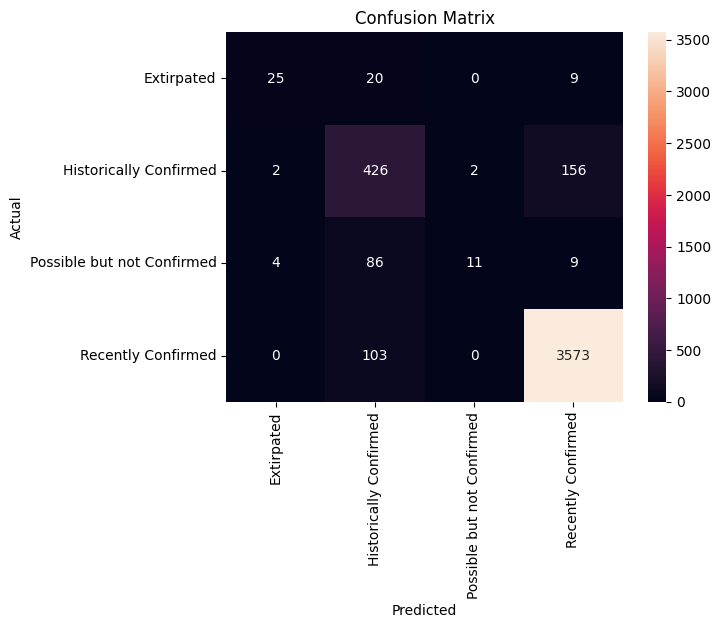

In [ ]:
# Confusion matrix: Random Forest Model
evaluate_classification_model(y_test, y_pred1)

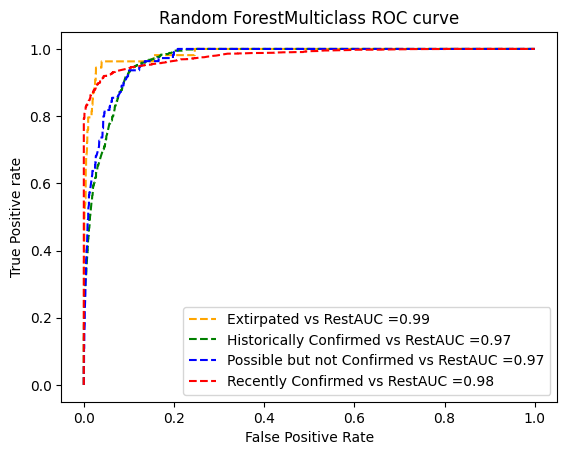

In [ ]:
# AUC curve for Random Forest
plot_curve(y_test, y_pred_prob1, 'Random Forest')

Model2: XGB

In [ ]:
X = combined

In [ ]:
# Removing Unnamed: 0 column from the list of columns
col_xgb = col_xgb.drop("Unnamed: 0")

In [ ]:
col_xgb

Index(['County_Allegany', 'County_Atlantic Ocean and Long Island Sound',
       'County_Bronx', 'County_Broome', 'County_Cattaraugus', 'County_Cayuga',
       'County_Chautauqua', 'County_Chemung', 'County_Chenango',
       'County_Clinton',
       ...
       'Year Last Documented_2018', 'Year Last Documented_2019',
       'Year Last Documented_2020', 'Year Last Documented_not available',
       'NY Listing Status_Protected Bird', 'NY Listing Status_Rare',
       'NY Listing Status_Threatened', 'NY Listing Status_not listed',
       'State Conservation Rank', 'Global Conservation Rank'],
      dtype='object', length=324)

Extracting the selected features from XGBoost model in X

In [ ]:
X = X[col_xgb]
col = X.columns

In [ ]:
col

Index(['County_Allegany', 'County_Atlantic Ocean and Long Island Sound',
       'County_Bronx', 'County_Broome', 'County_Cattaraugus', 'County_Cayuga',
       'County_Chautauqua', 'County_Chemung', 'County_Chenango',
       'County_Clinton',
       ...
       'Year Last Documented_2018', 'Year Last Documented_2019',
       'Year Last Documented_2020', 'Year Last Documented_not available',
       'NY Listing Status_Protected Bird', 'NY Listing Status_Rare',
       'NY Listing Status_Threatened', 'NY Listing Status_not listed',
       'State Conservation Rank', 'Global Conservation Rank'],
      dtype='object', length=324)

In [ ]:
X

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,Year Last Documented_2018,Year Last Documented_2019,Year Last Documented_2020,Year Last Documented_not available,NY Listing Status_Protected Bird,NY Listing Status_Rare,NY Listing Status_Threatened,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,3,3
14749,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
14750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,3,3
14751,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,7,4


In [ ]:
# Standardization before train test splitting will result in standardized test data also.
sc_rf = StandardScaler()
X = sc_rf.fit_transform(X)
X = pd.DataFrame(X, columns = col)

In [ ]:
y = df['Distribution Status']

In [ ]:
df['Distribution Status'].value_counts()

Recently Confirmed            12298
Historically Confirmed         1849
Possible but not Confirmed      413
Extirpated                      193
Name: Distribution Status, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 1)

Label encoding the target variable

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
y_test = le.fit_transform(y_test)

In [ ]:
le.classes_

array(['Extirpated', 'Historically Confirmed',
       'Possible but not Confirmed', 'Recently Confirmed'], dtype=object)

In [ ]:
y_train

array([3, 3, 3, ..., 3, 1, 3])

In [ ]:
X_train

,County_Allegany,County_Atlantic Ocean and Long Island Sound,County_Bronx,County_Broome,County_Cattaraugus,County_Cayuga,County_Chautauqua,County_Chemung,County_Chenango,County_Clinton,...,Year Last Documented_2018,Year Last Documented_2019,Year Last Documented_2020,Year Last Documented_not available,NY Listing Status_Protected Bird,NY Listing Status_Rare,NY Listing Status_Threatened,NY Listing Status_not listed,State Conservation Rank,Global Conservation Rank
11211,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,1.124176,-0.201202,-0.319822,-0.248032,0.894558,0.343239
4422,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.889540,-0.201202,-0.319822,-0.248032,0.608559,0.343239
10204,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,1.124176,-0.201202,-0.319822,-0.248032,0.894558,0.343239
5854,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.889540,4.970120,-0.319822,-0.248032,-0.535436,-1.705226
4473,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.889540,-0.201202,-0.319822,-0.248032,-1.965430,0.343239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.115133,-0.020171,-0.112381,-0.116036,7.495477,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.889540,-0.201202,-0.319822,-0.248032,0.036562,0.343239
5192,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.889540,-0.201202,-0.319822,4.031745,1.180557,-5.802155
12172,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,-0.418413,-0.889540,-0.201202,-0.319822,-0.248032,-1.965430,0.343239
235,-0.115133,-0.020171,-0.112381,-0.116036,-0.133414,-0.13156,-0.12941,-0.121322,-0.116036,-0.133939,...,-0.090557,-0.098232,-0.089793,2.389981,-0.889540,-0.201202,-0.319822,-0.248032,-1.965430,0.343239


In [ ]:
# Predictions using model2: XGBoost
y_pred2 = model2.predict(X_test)
y_pred_prob2 = model2.predict_proba(X_test)

                            precision    recall  f1-score   support

                Extirpated       0.76      0.57      0.65        54
    Historically Confirmed       0.72      0.90      0.80       586
Possible but not Confirmed       0.60      0.23      0.33       110
        Recently Confirmed       0.99      0.97      0.98      3676

                  accuracy                           0.94      4426
                 macro avg       0.77      0.67      0.69      4426
              weighted avg       0.94      0.94      0.94      4426



AttributeError: module 'matplotlib.pyplot' has no attribute 'xtickslabels'

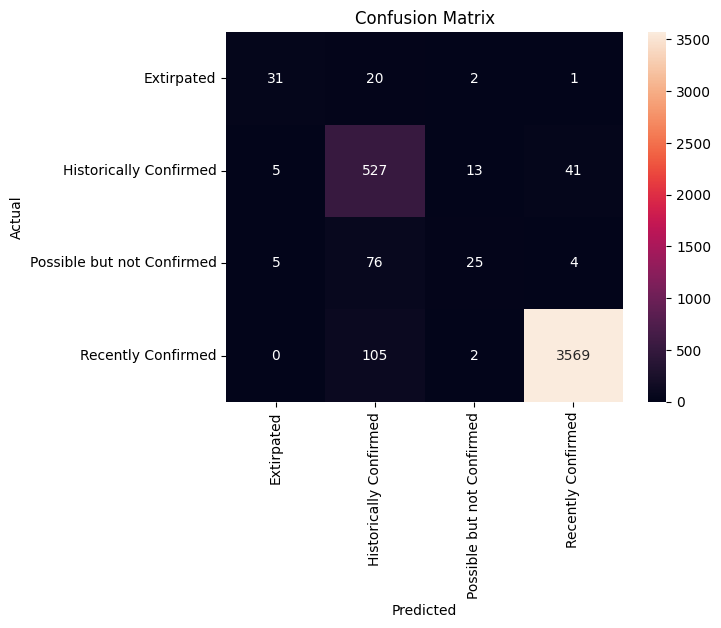

In [ ]:
# Confusion Matrix: XGBoost Model
evaluate_classification_model(y_test, y_pred2)

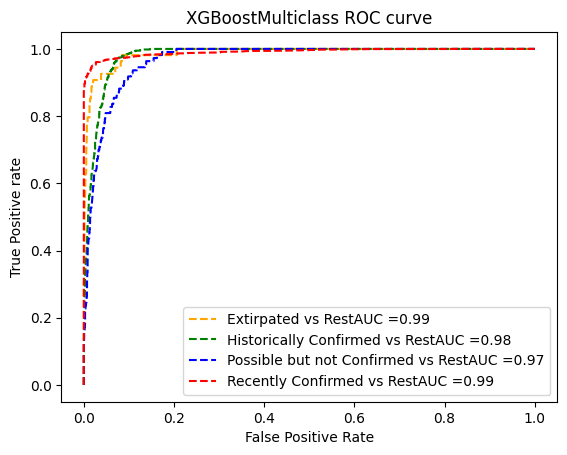

In [ ]:
# AUC curve for XGBoost model
plot_curve(y_test, y_pred_prob2, 'XGBoost')